In [27]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [28]:
nowcast_tracer_path = "/results/SalishSea/nowcast-green/12apr16/SalishSea_1h_20160412_20160412_ptrc_T.nc"
diat_iopt_84_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/apr12_double_iopt_diat/SalishSea_1h_20160412_20160412_ptrc_T.nc"
diat_iopt_55_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/april12_55_iopt_diat/SalishSea_1h_20160412_20160412_ptrc_T.nc"

n_grid_t = xr.open_dataset(nowcast_tracer_path)
#m_grid_t = xr.open_dataset(diat_iopt_84_tracer_path)
m_grid_t = xr.open_dataset(diat_iopt_55_tracer_path)

In [10]:
NO3_subset_20m = ((m_grid_t["NO3"] - n_grid_t["NO3"]).where(m_grid_t["O2"] != 0).isel(deptht = 18, time_counter = 23))

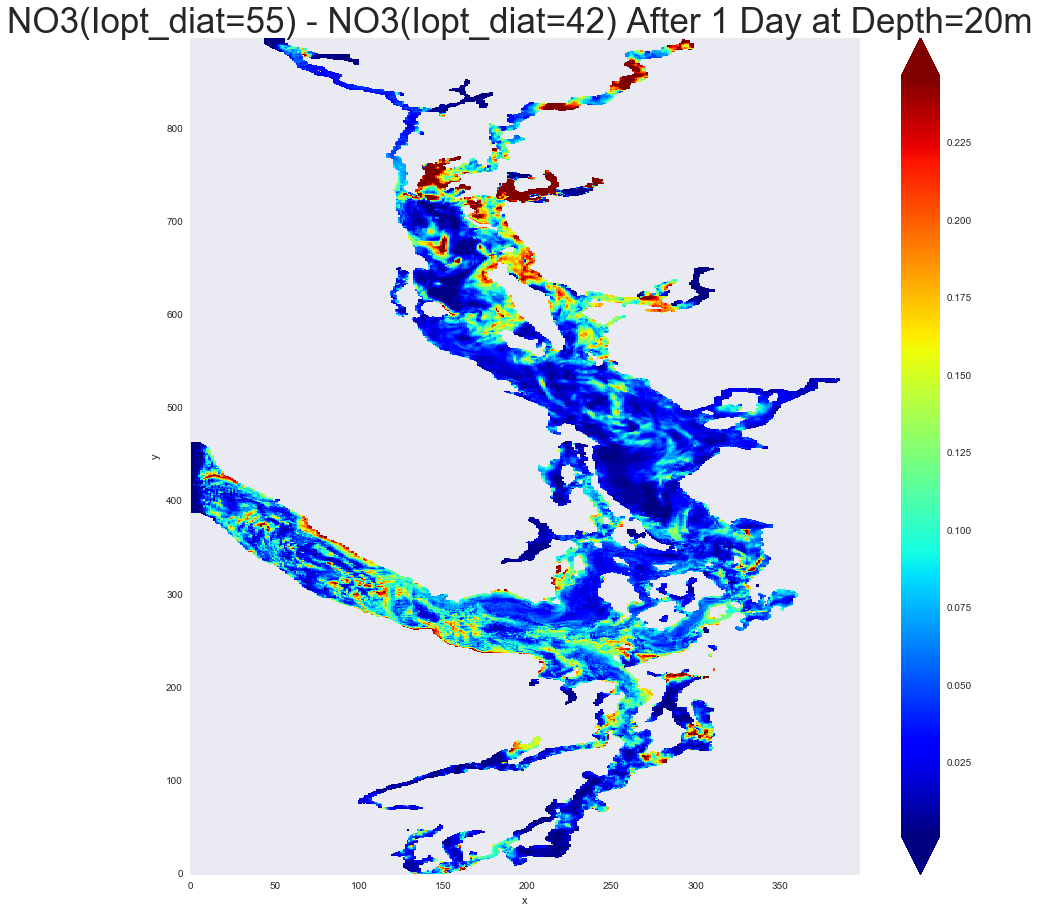

In [15]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
NO3_subset_20m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("NO3(Iopt_diat=55) - NO3(Iopt_diat=42) After 1 Day at Depth=20m ", size = 35)

In [17]:
NO3_subset_0m = ((m_grid_t["NO3"] - n_grid_t["NO3"]).where(m_grid_t["O2"] != 0).isel(deptht = 0, time_counter = 23))

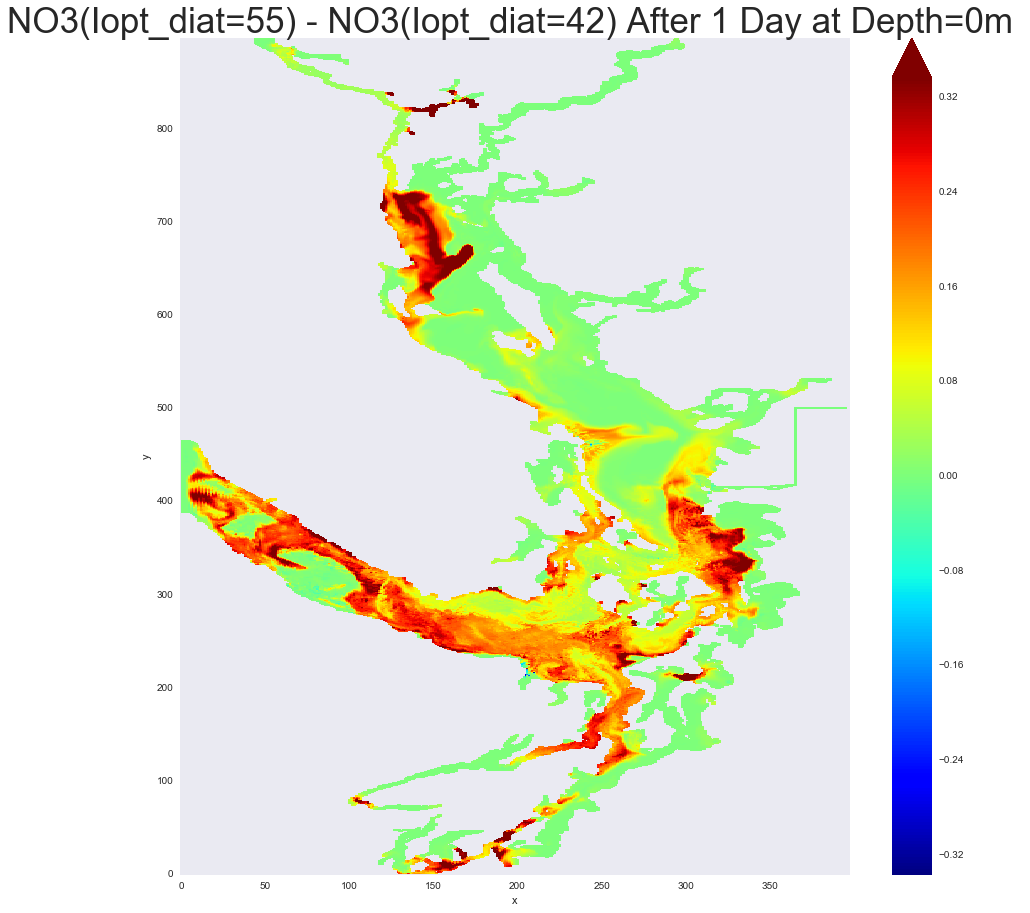

In [20]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
NO3_subset_0m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("NO3(Iopt_diat=55) - NO3(Iopt_diat=42) After 1 Day at Depth=0m ", size = 35)

In [24]:
PHY2_subset_20m = ((m_grid_t["PHY2"] - n_grid_t["PHY2"]).where(m_grid_t["O2"] != 0).isel(deptht = 19, time_counter = 23))

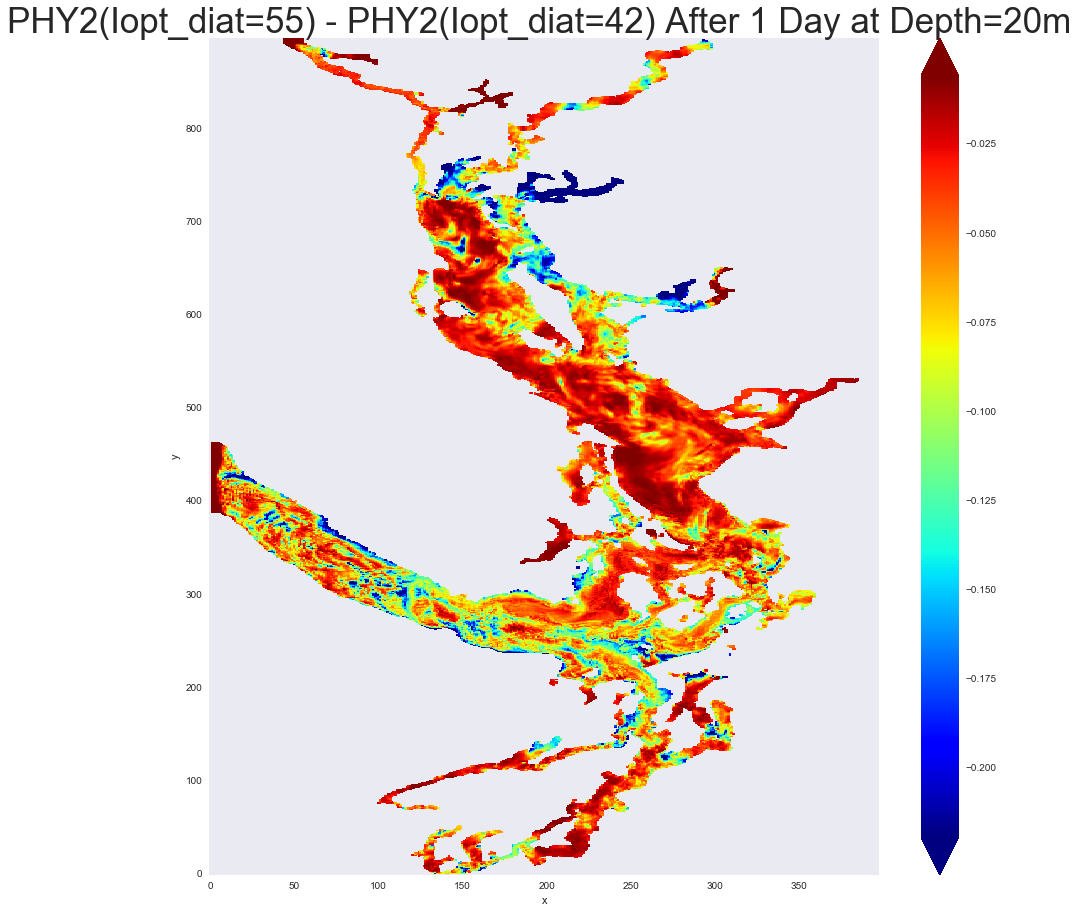

In [25]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
PHY2_subset_20m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("PHY2(Iopt_diat=55) - PHY2(Iopt_diat=42) After 1 Day at Depth=20m ", size = 35)

In [29]:
PHY2_subset_0m = ((m_grid_t["PHY2"] - n_grid_t["PHY2"]).where(m_grid_t["O2"] != 0).isel(deptht = 0, time_counter = 23))

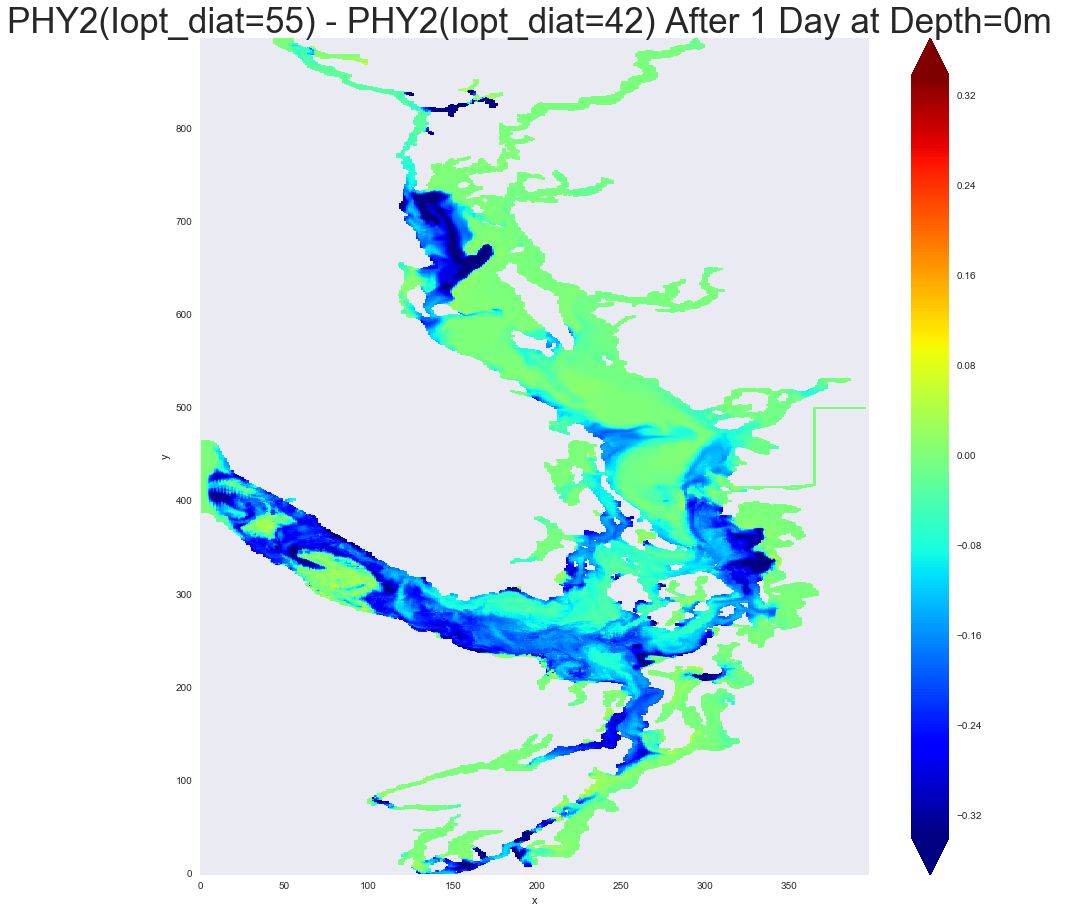

In [31]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
PHY2_subset_0m.plot(ax = ax, cmap = "jet", robust = True)
plt.title("PHY2(Iopt_diat=55) - PHY2(Iopt_diat=42) After 1 Day at Depth=0m ", size = 35)

In [3]:
# Have to keep this and the next cell apart or it fails with memory error. Something to do with 
# Jupyter notebook caching
tracer = "PHY2"
mod_tracer_depth_time =  m_grid_t[tracer].where(m_grid_t["O2"] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)

In [4]:
now_tracer_depth_time =  n_grid_t[tracer].where(n_grid_t["O2"] != 0).mean(dim = ["x","y"]).to_dataframe(name = "MEAN_" + tracer)
var_name = "MEAN_" + tracer

In [5]:
mod_tracer_depth_time["DATA_SOURCE"] = "IOPT DIAT = 84"
now_tracer_depth_time["DATA_SOURCE"] = "Nowcast"
combined = pd.concat([mod_tracer_depth_time, now_tracer_depth_time])
combined.reset_index(inplace=True)

In [6]:
%load_ext rpy2.ipython

In [7]:
%%R 
require(ggplot2)
require(data.table)
library(repr)

/home/jpetrie/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/home/jpetrie/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: data.table

  warnings.warn(x, RRuntimeWarning)
/home/jpetrie/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: data.table 1.9.6  For help type ?data.table or https://github.com/Rdatatable/data.table/wiki

  warnings.warn(x, RRuntimeWarning)
/home/jpetrie/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The fastest way to learn (by data.table authors): https://www.datacamp.com/courses/data-analysis-the-data-table-way

  warnings.warn(x, RRuntimeWarning)


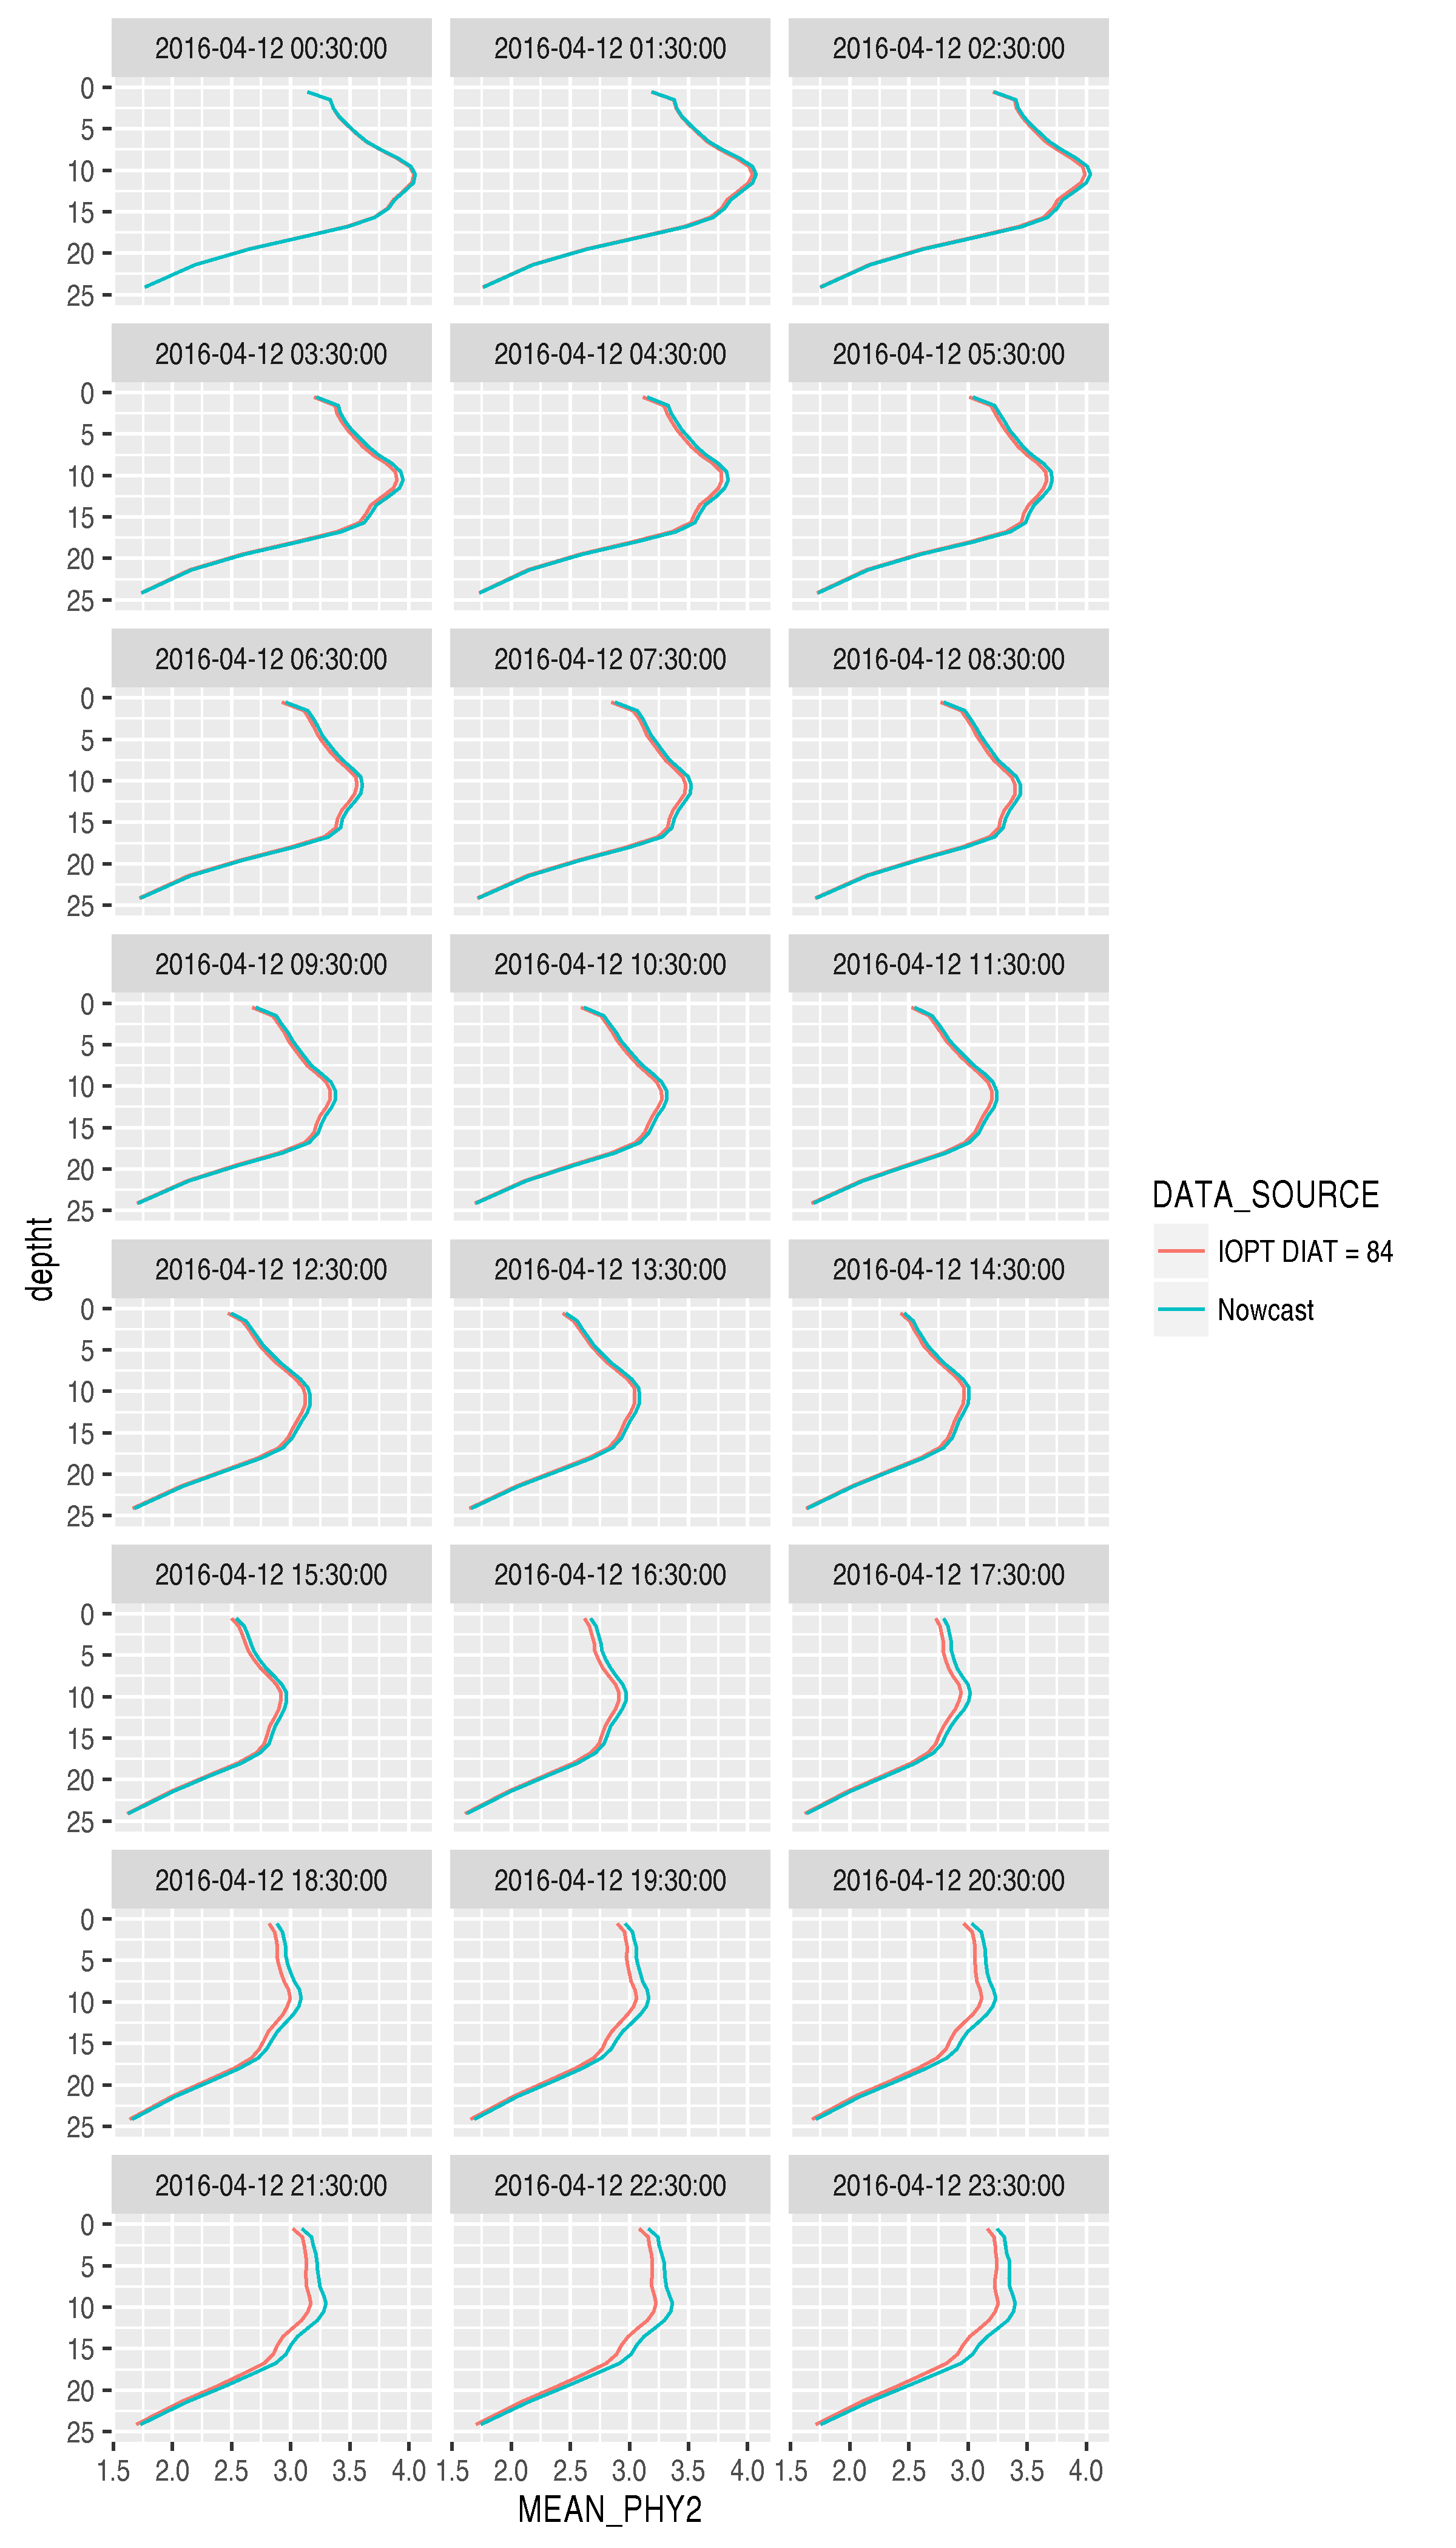

In [8]:
%%R -i combined,var_name -h 4200 -w 2400 -r 400
combined = data.table(combined)
ggplot(combined[deptht < 25 ], aes_string(y = "deptht", x = var_name, colour = "DATA_SOURCE")) + 
    geom_path() + ylim(25,0) +
    facet_wrap(~time_counter, ncol = 3)